In [18]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Statistical power

The following four factors have an intimate relationship:

- Sample size
- Effect size
- Significance level = P (Type I error) = probability of finding an effect that is not there
- Power = 1 - P (Type II error) = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

How daily protein supplementation in the elderly population will affect baseline liver fat. Placebo vs. Protein suplement:

Null hypothesis: There is no difference between experimental and control means i.e. H0 is equal to H1
Alternative hypothesis: There is a difference between experimental and control means i.e. H0 is not equal to H1

The researcher needs to know what power will be obtained under the sample size restrictions (24) to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis.

In [19]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0
control_sd = .21

# Experimental group
experimental_mean = .17
experimental_sd = .21

#Set the number of simulations for our test = 1000
n_sim = 1000

In [20]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim
for sim in range(n_sim):
    control = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
    experimental = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=sample_size)
    ttest = stats.ttest_ind(control, experimental)
    p[sim] = ttest[1]

# number of null hypothesis rejections
num_null_rejects = np.sum(p < .05)
power = num_null_rejects / float(n_sim)

power

# 0.495

0.495

If a large effect (.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time.

**Often in behavioral research .8 is accepted as a sufficient level of power.**

In [21]:
# required power 0.95
target = .95

# minimum sample size to start the simulations 
sample_size = 12
null_rejected = 0
n_sim = 10000

In [22]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

power_sample = []
while null_rejected < target:

    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
    
    # For control group 
    # Here we specify size=[n_sim, sample_size] which creates an array of n_sim number of arrays,
    # each containing sample_size number of elements. 
    # This is equivalent to manually looping n_sim times like we did above but is much faster.
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    
    # For experimental group
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            
    
    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
                                
    p_vals = result[1]

    #Since you know that all simulations are from a different distribution \
    #all those that rejected the null-hypothesis are valid
    null_rejected = np.sum(p_vals < 0.05) / n_sim

    print("Number of Samples:", sample_size,", Calculated Power =", null_rejected)
    power_sample.append([sample_size, null_rejected])

    # increase the number of samples by one for the next iteration of the loop
    sample_size += 1

Number of Samples: 12 , Calculated Power = 0.4754
Number of Samples: 13 , Calculated Power = 0.5066
Number of Samples: 14 , Calculated Power = 0.5423
Number of Samples: 15 , Calculated Power = 0.5767
Number of Samples: 16 , Calculated Power = 0.6038
Number of Samples: 17 , Calculated Power = 0.6297
Number of Samples: 18 , Calculated Power = 0.658
Number of Samples: 19 , Calculated Power = 0.6783
Number of Samples: 20 , Calculated Power = 0.7056
Number of Samples: 21 , Calculated Power = 0.7266
Number of Samples: 22 , Calculated Power = 0.7481
Number of Samples: 23 , Calculated Power = 0.7624
Number of Samples: 24 , Calculated Power = 0.7864
Number of Samples: 25 , Calculated Power = 0.8031
Number of Samples: 26 , Calculated Power = 0.8178
Number of Samples: 27 , Calculated Power = 0.8354
Number of Samples: 28 , Calculated Power = 0.8405
Number of Samples: 29 , Calculated Power = 0.8568
Number of Samples: 30 , Calculated Power = 0.8736
Number of Samples: 31 , Calculated Power = 0.8786
N

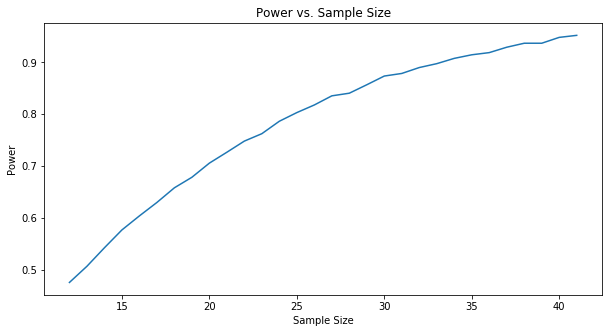

In [23]:
# Plot a sample size X Power line graph 
plt.figure(figsize=(10,5))
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = power_sample
df = pd.DataFrame(ans, index=None)
plt.plot(df[0], df[1])

plt.show()